# **Product Brand Sentiment Analysis**

## 🔍 **1.0 Business Understanding**
---

In today's digital age, social media platforms like Twitter have become crucial channels for customers to express their opinions about brands and products. Understanding customer sentiment towards products can provide companies with valuable insights to improve their offerings, marketing strategies, and customer service. This project aims to analyze tweets directed at various tech brands and products during the SXSW (South by Southwest) conference to understand customer sentiment patterns. By doing so, companies can gain real-time feedback about their products and competitors, enabling data-driven decision making.

### ⚠️ **1.1 Challenges**

Key challenges include:

1. Analyzing unstructured text data from tweets to extract meaningful sentiment

2. Handling ambiguous or sarcastic tweets that might be misclassified

3. Dealing with imbalanced classes in sentiment categories

4. Identifying which brands/products receive the most attention and strongest sentiment

5. Developing a robust sentiment classification model that performs well across different brands


### 💡 **1.2 Proposed Solution**

Conduct a comprehensive analysis of SXSW tweet data to:

1. Explore and visualize sentiment distribution across different brands and products

2. Examine the relationship between product categories and sentiment polarity

3. Apply natural language processing techniques to extract features from tweet text

4. Train and evaluate multiple sentiment classification models

5. Provide actionable insights about brand perception during the event

6. Create an API for real-time sentiment analysis of new tweets

### ✅ **1.3 Conclusion**

By analyzing tweet sentiment, companies can gain real-time feedback about their products' reception at major events like SXSW. This project will help brands understand customer perceptions, identify pain points, and track how their products compare to competitors in public discourse.

### 📌 **1.4 Problem Statement**

Tech companies need to understand how their products are being received at major industry events like SXSW. As Shujaa Data Analytics we have been hired by major Tech brands to analyze twitter sentiments regarding how their products are percieved. The current process of manually reviewing social media is time-consuming and inconsistent. We aim to build an automated system that can classify sentiment in tweets mentioning tech products, providing real-time insights into customer perceptions.

### 🎯 **1.5 Objectives**

1. To explore the distribution of sentiment across different tech brands and products

2. To analyze the relationship between brand category and sentiments

3. To identify which brands/products generate the most positive/negative sentiment

4. To build and evaluate a sentiment classification model that achieves good performance

5. To create a deployable API for real-time sentiment analysis


## 📊 **2.0 Data Understanding**
---

### 🌐 **2.1 Data Source**

The dataset contains tweets from the SXSW 2011 conference, https://data.world/crowdflower/brands-and-product-emotions, that mention various tech brands and products. It includes the tweet text, the brand/product being mentioned, and the sentiment label.

### 🧾 **2.2 Column Description**

Key features include:

Tweet Information

`tweet_text`: The content of the tweet

`emotion_in_tweet_is_directed_at`: The brand/product being mentioned (e.g., iPhone, iPad, Google, Android)

`is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment label (Positive, Negative, No emotion, I can't tell)

### 📈 **2.3 Exploratory Data Analysis**

Let's load the data and perform initial exploration:

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, FunctionTransformer, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, roc_curve,auc
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
import re
import nltk
from collections import Counter
import joblib
from scipy.stats import uniform
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the data into a dataframe
df = pd.read_csv("data/judge-1377884607_tweet_product_company.csv", encoding='latin-1')

# Display the first 5rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# rename columns for cleaner outlook
df.columns = ["tweet", "brand", "sentiment"]
df.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# Review overall summary of te dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   brand      3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#check shape of dataset
df.shape

(9093, 3)

In [6]:
# Check for any duplicates
df.duplicated().sum()

np.int64(22)

In [7]:
# Check for null values
df.isna().sum()

tweet           1
brand        5802
sentiment       0
dtype: int64

In [8]:
# Make a copy of df for EDA
sent_df = df.copy()

# Clean the brand column
sent_df["brand"] = sent_df["brand"].fillna("Unknown")

#Review brand unique values
brands = sent_df["brand"].value_counts(normalize=True)
brands

brand
Unknown                            0.638073
iPad                               0.104036
Apple                              0.072693
iPad or iPhone App                 0.051688
Google                             0.047289
iPhone                             0.032662
Other Google product or service    0.032223
Android App                        0.008908
Android                            0.008578
Other Apple product or service     0.003849
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Brands Distribution')

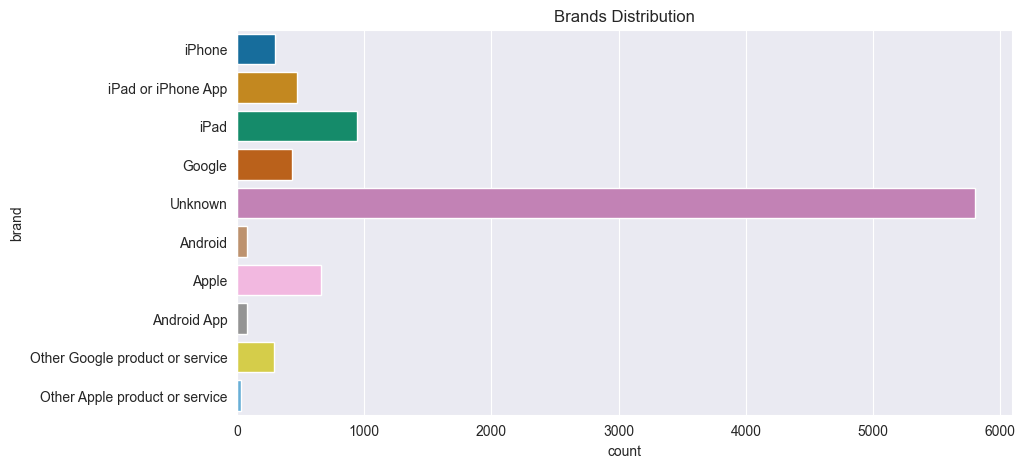

In [9]:
# Visualize the brand counts
# set grid style
sns.set_style(style='darkgrid')

# plot the loan status distribution count
plt.figure(figsize=(10,5))
sns.countplot(data=sent_df, 
              y='brand', 
              hue='brand', 
              palette="colorblind",
              legend=False)
plt.title('Brands Distribution')

Most of the attributes for the brand feature were not labeled

In [10]:
# Review unique sentiment values
sent_df["sentiment"].value_counts(normalize=True)

sentiment
No emotion toward brand or product    0.592654
Positive emotion                      0.327505
Negative emotion                      0.062686
I can't tell                          0.017156
Name: proportion, dtype: float64

2.3.1 To explore the distribution of sentiment across different tech brands and products

In [11]:
# Create simplified sentiments Labels
sent_map = {"No emotion toward brand or product": "No emotion",
            "Positive emotion": "Positive",
            "Negative emotion": "Negative",
            "I can't tell": "Uncertain"}

# Applying mapping of labels to the sentiment column
sent_df['sentiment'] = sent_df["sentiment"].map(sent_map)
sent_df.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [12]:
# Review unique sentiment values
sent_df["sentiment"].value_counts(normalize=True)

sentiment
No emotion    0.592654
Positive      0.327505
Negative      0.062686
Uncertain     0.017156
Name: proportion, dtype: float64

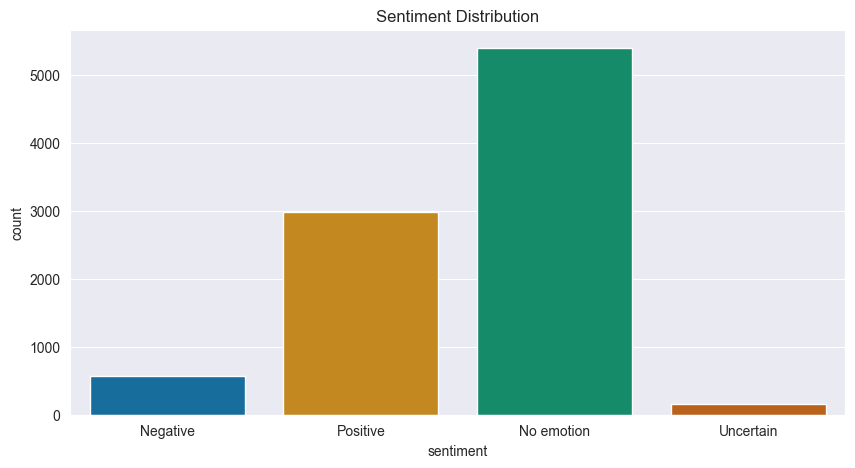

In [13]:
# Visualize the sentiments

# set grid style
sns.set_style(style='darkgrid')

# plot the loan status distribution count
plt.figure(figsize=(10,5))
sns.countplot(data=sent_df, 
              x='sentiment', 
              hue='sentiment', 
              palette="colorblind",
              legend=False)
plt.title('Sentiment Distribution')

# save
plt.savefig("images/sent_dist.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

We can infer that we have an data Imbalance

2.3.2 To analyze the relationship between brand category and sentiments

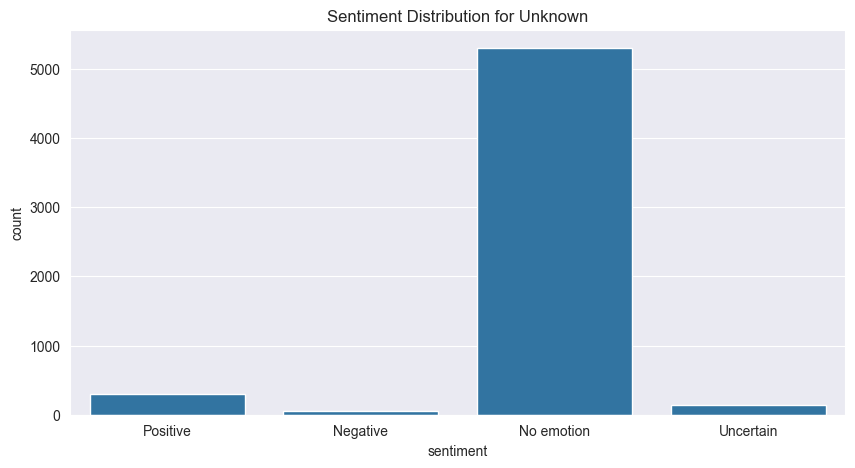

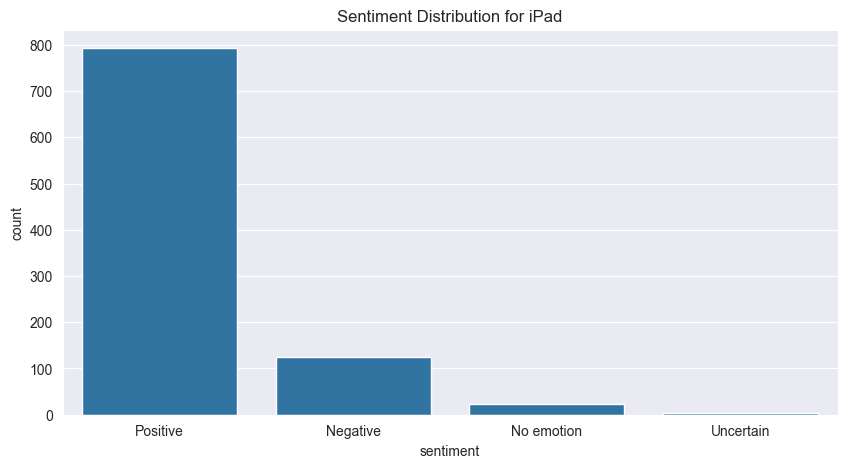

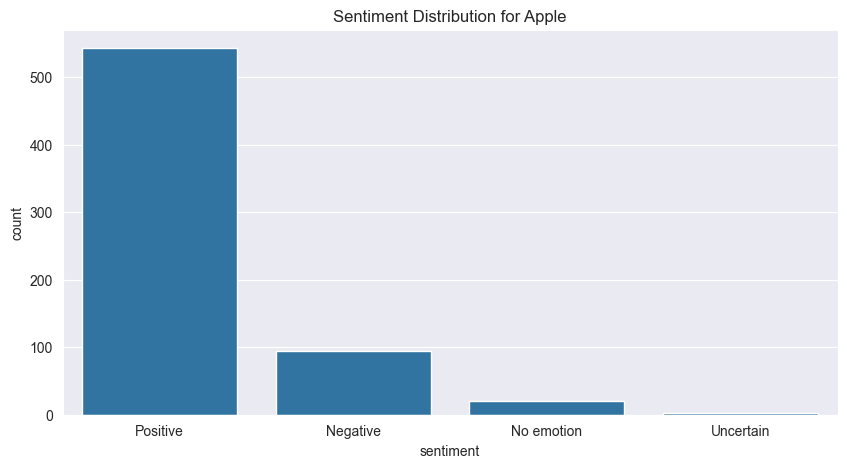

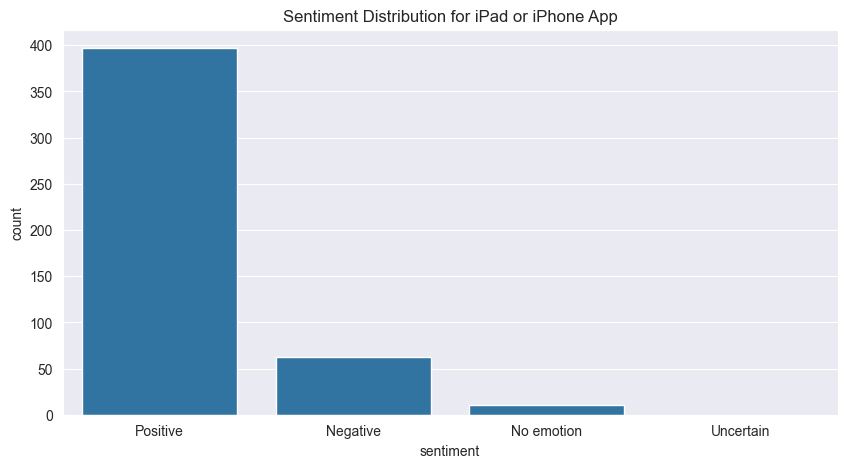

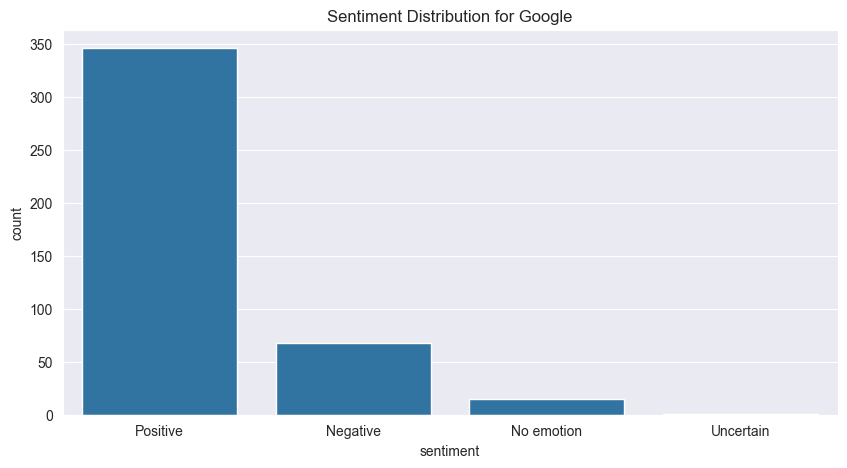

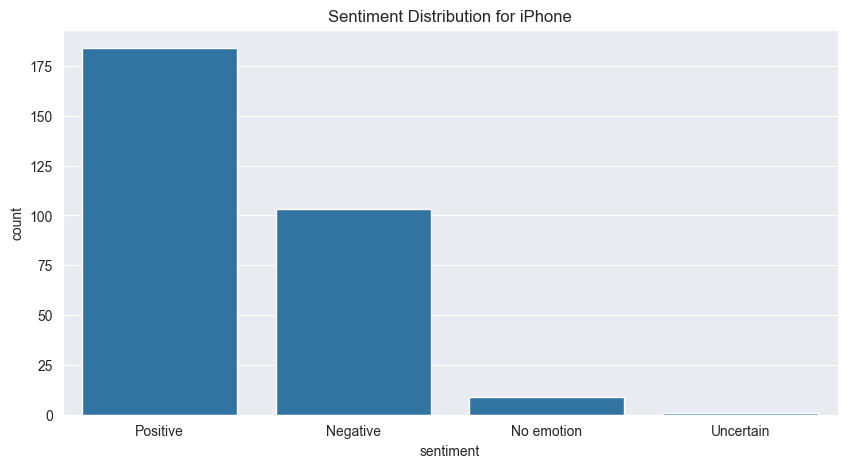

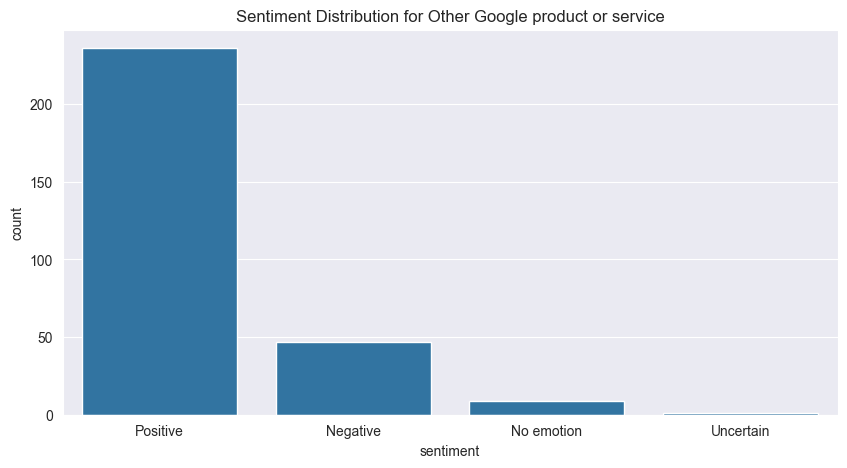

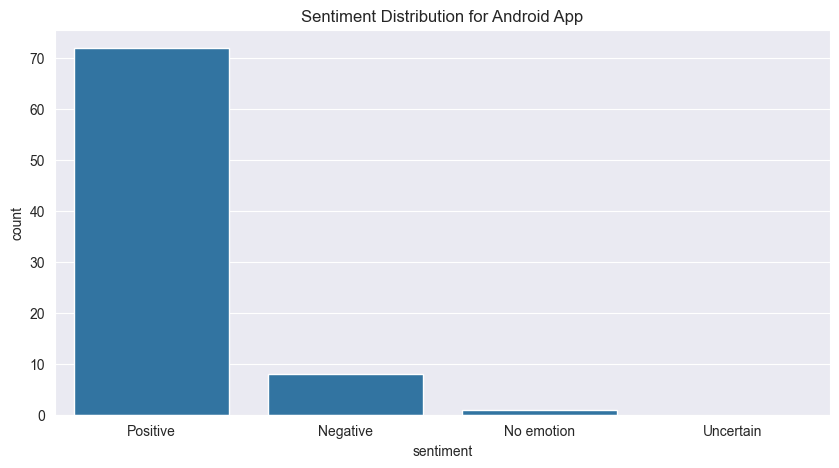

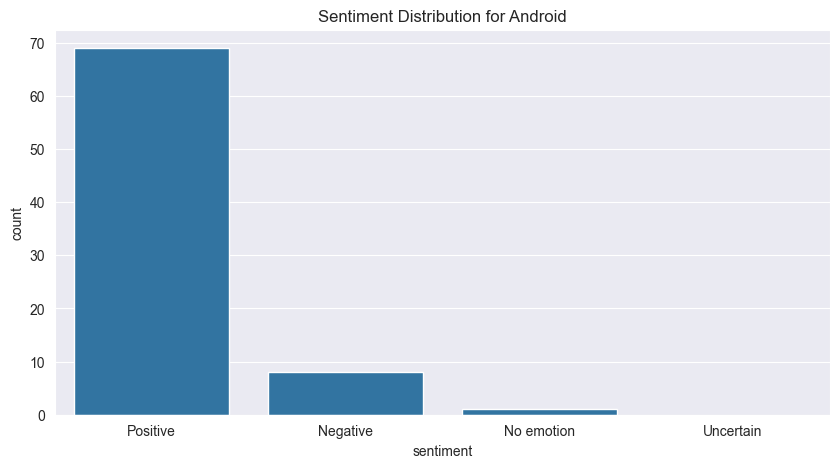

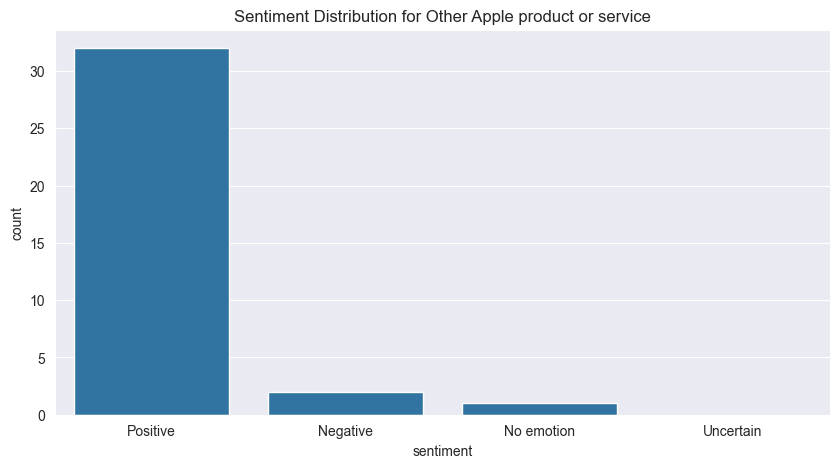

In [14]:
# Sentiment by brands
for b in brands.index:
    brand_data = sent_df[sent_df['brand'] == b]
    plt.figure(figsize=(10, 5))
    sns.countplot(data=brand_data, 
                  x='sentiment', 
                  order=['Positive', 'Negative', 'No emotion', "Uncertain"])
    plt.title(f'Sentiment Distribution for {b}')
    plt.show()

2.3.3 To identify which brands/products generate the most positive/negative sentiment

In [15]:
# Group by brand and sentiment, then count occurrences
sent_counts = sent_df.groupby(['brand', 'sentiment']
                               )['sentiment'].agg('count').unstack().fillna(0)

# Sort by most positive brands
most_positive = sent_counts['Positive'].sort_values(ascending=False)


print("--- Most Positive Brands ---")
print(most_positive.head())

--- Most Positive Brands ---
brand
iPad                  793.0
Apple                 543.0
iPad or iPhone App    397.0
Google                346.0
Unknown               306.0
Name: Positive, dtype: float64


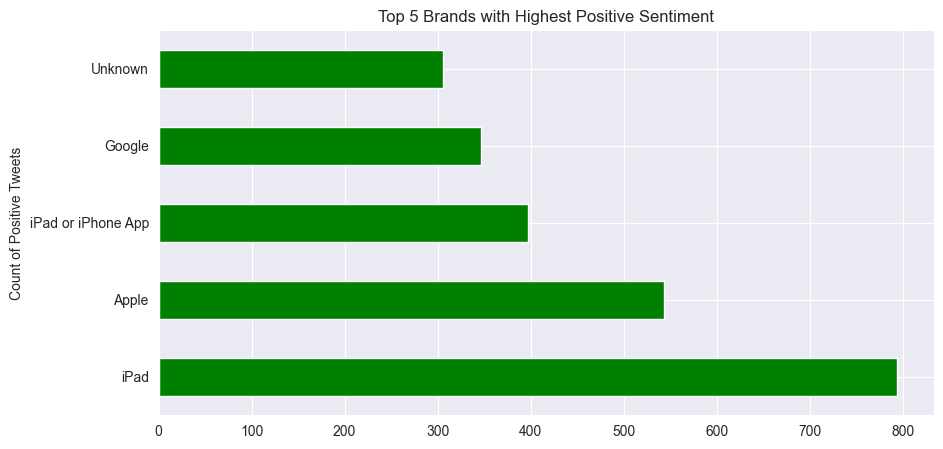

In [16]:
# Plot top 5 positive brands
plt.figure(figsize=(10, 5))
most_positive.head(5).plot(kind='barh', color='green')
plt.title('Top 5 Brands with Highest Positive Sentiment')
plt.ylabel('Count of Positive Tweets')

# save
plt.savefig("images/pos_sent.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

In [17]:
# Sort by most negative brands
most_negative = sent_counts['Negative'].sort_values(ascending=False)

print("--- Most Negative Brands ---")
print(most_negative.head())

--- Most Negative Brands ---
brand
iPad                  125.0
iPhone                103.0
Apple                  95.0
Google                 68.0
iPad or iPhone App     63.0
Name: Negative, dtype: float64


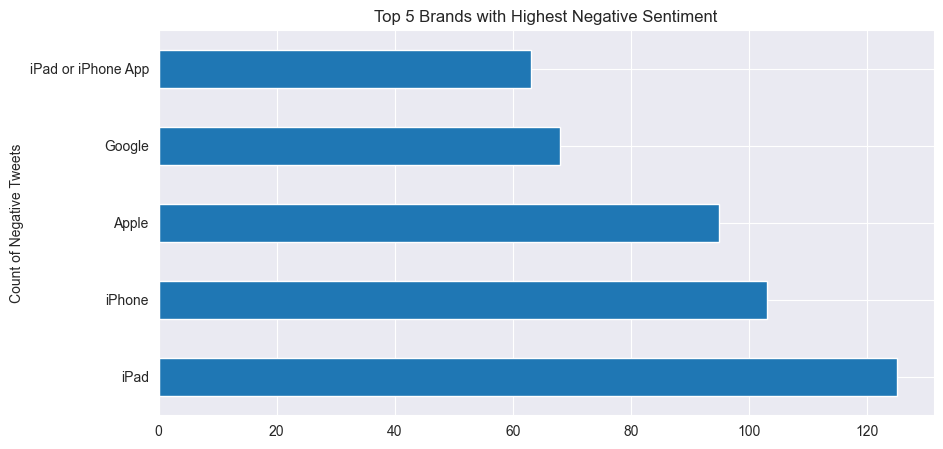

In [18]:
# Plot top 5 negative brands
plt.figure(figsize=(10, 5))
most_negative.head(5).plot(kind='barh')
plt.title('Top 5 Brands with Highest Negative Sentiment')
plt.ylabel('Count of Negative Tweets')

# save
plt.savefig("images/neg_sent.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

## 🧹 **3.0 Data Preparation**
---

### 🧼 **3.1 Data cleaning**

In [19]:
# Applying mapping of labels to the sentiment column
df['sentiment'] = df["sentiment"].map(sent_map)
df.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [20]:
# Check the percentage null values per feature
null = (df.isna().sum()/len(df))*100
null

tweet         0.010997
brand        63.807324
sentiment     0.000000
dtype: float64

In [21]:
# Drop brand column
df.drop(columns='brand', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   sentiment  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


In [22]:
# Drop all null values
df.dropna(inplace=True)
df.isna().sum()

tweet        0
sentiment    0
dtype: int64

In [23]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Display info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9070 non-null   object
 1   sentiment  9070 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [24]:
# Display value count of the target
df['sentiment'].value_counts()

sentiment
No emotion    5375
Positive      2970
Negative       569
Uncertain      156
Name: count, dtype: int64

In [25]:
# Remove the uncertain class it will create noise for our model
df = df[df["sentiment"]!="Uncertain"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8914 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      8914 non-null   object
 1   sentiment  8914 non-null   object
dtypes: object(2)
memory usage: 208.9+ KB


In [26]:
# Function to clean the data

def text_cleaning(text):
    
    # remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # remove mentions
    text = re.sub(r'@\w+', '', text)

    # remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Handle RT tags
    text = re.sub(r'[Rr][Tt]', '', text)

    # lowercasing 
    text = str.lower(text)

    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip() 

    return text

In [27]:
# Function to diplay frequency distribution of the mostly used words

def corpus_freq(text, top_n, language):
    
    # Create our list of stopwords
    stopwords_list = nltk.corpus.stopwords.words(language)

    # Creates bag of words for all the text in data
    bag_of_words = text.to_list()

    # Tokenize the words
    bag_of_words = [nltk.word_tokenize(i) for i in bag_of_words]

    # Create a list of all tokens with lower case
    bag_of_words = [word.lower() for list in bag_of_words for word in list]

    # Remove all stopwords
    bag_of_words = [word for word in bag_of_words if word not in stopwords_list]

    # Create frequency distribution
    word_freq = Counter(bag_of_words)
    word_df = pd.DataFrame(word_freq.items(), columns=['word', 'count'])
    word_df = word_df.sort_values(by='count', ascending=False).reset_index(drop=True)
    return word_df.head(top_n)
    

In [28]:
clean_df = df.copy()
clean_df['tweet'] = clean_df['tweet'].apply(text_cleaning)
top_ten_words = corpus_freq(clean_df['tweet'], 10, 'english')
top_ten_words

,word,count
0,sxsw,9480
1,link,4249
2,ipad,2958
3,google,2600
4,apple,2300
5,quot,1657
6,iphone,1558
7,store,1468
8,new,1075
9,austin,957


### 🛠️ **3.2 Preprocessing**

In [29]:
# Function to tokenize and lemmatize text

def tokenizer_lemmatizer(text):

    # Create tokens for the words
    tokens = nltk.word_tokenize(text)

    # instantiate lemmatizer
    lemmatizer = nltk.WordNetLemmatizer()

    # Create lemmas for the tokenized words
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(lemmas)


In [30]:
# Function to feature engineer no. of characters, words and sentences within a text

def feature_engineer(text):

    # Count of characters in a text
    chars_count = len(text)

    # Count of words in a text
    words_count= len(nltk.word_tokenize(text))

    # Count of sentences within a text
    sentence_count = len(nltk.sent_tokenize(text))

    return [chars_count, words_count, sentence_count]

## 🤖 **4.0 Modeling**
---

### 4.1 Logistic Regression(Base Model)

In [31]:
# Define X and y
X = df['tweet']
y = df['sentiment']

# Encode the labels of target
y = y.apply(lambda x: 
    0 if x=='No emotion' else 
    1 if x=='Positive' else 
    2)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

In [32]:
# Functions as a substitute for lambda
from preprocessing import apply_feature_engineer, apply_text_cleaning, apply_tokenizer_lemmatizer

# Create transfomer to clean data
text_transformer = Pipeline([
    ("text_cleaner", FunctionTransformer(apply_text_cleaning)),
    ("lemma", FunctionTransformer(apply_tokenizer_lemmatizer)),
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000))
])

# Create feature engineering transformer
feat_eng_transfomer = Pipeline([
    ('text_cleaner', FunctionTransformer(apply_text_cleaning)),
    ('feature_engineer', FunctionTransformer(apply_feature_engineer)),
    ("scaler", StandardScaler())
])

# Combine the two transformers
preprocessor = FeatureUnion([
    ('text_preprocess', text_transformer),
    ('feat_eng', feat_eng_transfomer)
])

# Instantiate model
logreg = LogisticRegression()


# Create modelling pipeline
nlp_pipe_eng = Pipeline([
    ('preprocess', preprocessor),
    ('smote', smote),
    ('model', logreg)
])

# Grid Search
lr_params = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['saga'],
    'model__max_iter': [1000]
}

# Fit the grid search
gs_lr_eng = GridSearchCV(nlp_pipe_eng, 
                         lr_params, 
                         scoring='accuracy', 
                         cv=5, 
                         n_jobs=-1)

gs_lr_eng.fit(X_train, y_train)

c:\Users\HP\Documents\DS_Moringa\Phase_4\Project_Env\dep-env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('text_preprocess',
                                                                        Pipeline(steps=[('text_cleaner',
                                                                                         FunctionTransformer(func=<function apply_text_cleaning at 0x000001CDA31A8EA0>)),
                                                                                        ('lemma',
                                                                                         FunctionTransformer(func=<function apply_tokenizer_lemmatizer at 0x000001CDA31AB740>)),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer(max_features=50...
                                                                                         FunctionTransformer(func=<function apply_text_cleaning at 0x000001CDA31A8EA0>)),
                                                                                        ('feature_engineer',
                                                                                         FunctionTransformer(func=<function apply_feature_engineer at 0x000001CDA31A80E0>)),
                                                                                        ('scaler',
                                                                                         StandardScaler())]))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10], 'model__max_iter': [1000],
                         'model__penalty': ['l2'], 'model__solver': ['saga']},
             scoring='accuracy')

{'model__C': 10, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'saga'} 

0.6364816585446096 

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1596
           1       0.54      0.58      0.56       889
           2       0.31      0.54      0.39       190

    accuracy                           0.63      2675
   macro avg       0.54      0.59      0.56      2675
weighted avg       0.66      0.63      0.64      2675



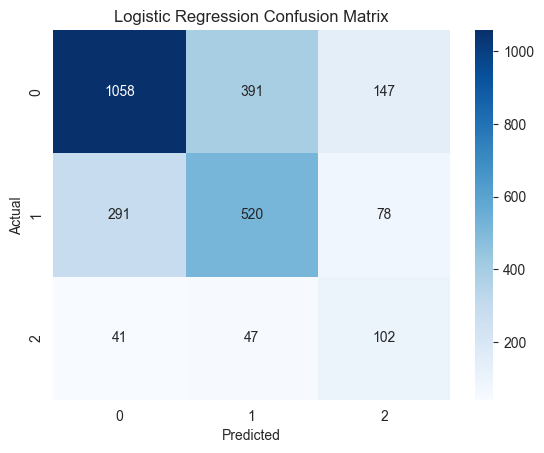

In [33]:
def model_perfomance(grid_search, model, image):
    
    # Best parameters and scores
    print(grid_search.best_params_, '\n')
    print(grid_search.best_score_, '\n')

    # Evaluate performance
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

    # confusion matrix for the predictions
    cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    sns.heatmap(cfm, fmt='d', annot=True, cmap="Blues")
    plt.title(f"{model} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # save
    plt.savefig(f"images/{image}_cfm.png", dpi=300, bbox_inches='tight')

    # Display 
    plt.show()



performance = model_perfomance(gs_lr_eng, "Logistic Regression", "lr")
performance

### 4.2 Random Forest

In [34]:
# 2. Performance with feature engineering

#Instanstiate model
rf = RandomForestClassifier(random_state=42)

# Set the model to our pipeline
nlp_pipe_eng.set_params(model=rf)

# Grid Search
rf_params = {
    'model__n_estimators': [100],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

# Fit the grid search
gs_rf_eng = GridSearchCV(nlp_pipe_eng, 
                         rf_params, 
                         scoring='accuracy', 
                         cv=5, 
                         n_jobs=-1)

gs_rf_eng.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('text_preprocess',
                                                                        Pipeline(steps=[('text_cleaner',
                                                                                         FunctionTransformer(func=<function apply_text_cleaning at 0x000001CDA31A8EA0>)),
                                                                                        ('lemma',
                                                                                         FunctionTransformer(func=<function apply_tokenizer_lemmatizer at 0x000001CDA31AB740>)),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer(max_features=50...
                                                                                        ('feature_engineer',
                                                                                         FunctionTransformer(func=<function apply_feature_engineer at 0x000001CDA31A80E0>)),
                                                                                        ('scaler',
                                                                                         StandardScaler())]))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100]},
             scoring='accuracy')

{'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 100} 

0.6757510332490285 

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.82      0.76      1596
           1       0.60      0.49      0.54       889
           2       0.62      0.25      0.36       190

    accuracy                           0.67      2675
   macro avg       0.64      0.52      0.55      2675
weighted avg       0.66      0.67      0.66      2675



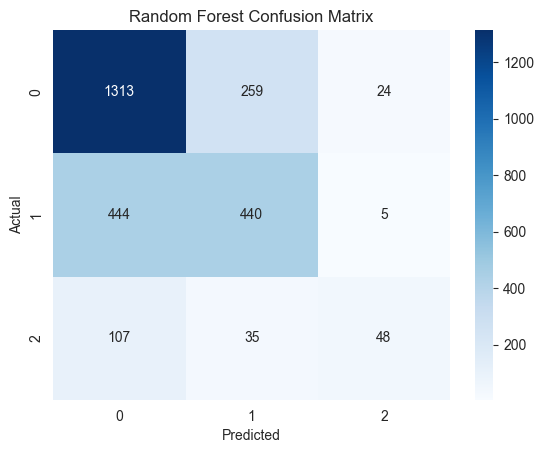

In [35]:

performance = model_perfomance(gs_rf_eng, "Random Forest", "rf")
performance

### 4.3 Gradient Boost

In [36]:
# 2. Performance with feature engineering

#Instanstiate model
gb = GradientBoostingClassifier()

# Set the model to our pipeline
nlp_pipe_eng.set_params(model=gb)

# Grid Search
gb_params = {
    'model__n_estimators': [200],
    'model__learning_rate': [0.1],
    'model__max_depth': [10],
    'model__min_samples_split': [5],
}

# Fit the grid search
gs_gb_eng = GridSearchCV(nlp_pipe_eng, 
                         gb_params, 
                         scoring='accuracy', 
                         cv=5, 
                         n_jobs=-1)

gs_gb_eng.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('text_preprocess',
                                                                        Pipeline(steps=[('text_cleaner',
                                                                                         FunctionTransformer(func=<function apply_text_cleaning at 0x000001CDA31A8EA0>)),
                                                                                        ('lemma',
                                                                                         FunctionTransformer(func=<function apply_tokenizer_lemmatizer at 0x000001CDA31AB740>)),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer(max_features=50...
                                                                                        ('feature_engineer',
                                                                                         FunctionTransformer(func=<function apply_feature_engineer at 0x000001CDA31A80E0>)),
                                                                                        ('scaler',
                                                                                         StandardScaler())]))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1],
                         'model__max_depth': [10],
                         'model__min_samples_split': [5],
                         'model__n_estimators': [200]},
             scoring='accuracy')

{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200} 

0.6783159068944955 

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      1596
           1       0.58      0.54      0.56       889
           2       0.60      0.29      0.39       190

    accuracy                           0.67      2675
   macro avg       0.63      0.54      0.57      2675
weighted avg       0.66      0.67      0.66      2675



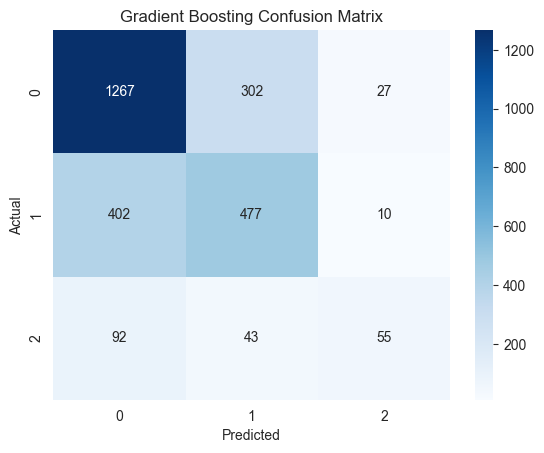

In [37]:
performance = model_perfomance(gs_gb_eng, "Gradient Boosting", "gb")
performance

### 4.4 XGBoost

In [38]:
#Instanstiate model
xgb = XGBClassifier()

# Set the model to our pipeline
nlp_pipe_eng.set_params(model=xgb)

xgb_params = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1], 
    'model__max_depth': [3, 6]  
}

# Fit the grid search
gs_xgb_eng = GridSearchCV(nlp_pipe_eng, 
                          xgb_params, 
                          scoring='accuracy', 
                          cv=5, 
                          n_jobs=-1)

gs_xgb_eng.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('text_preprocess',
                                                                        Pipeline(steps=[('text_cleaner',
                                                                                         FunctionTransformer(func=<function apply_text_cleaning at 0x000001CDA31A8EA0>)),
                                                                                        ('lemma',
                                                                                         FunctionTransformer(func=<function apply_tokenizer_lemmatizer at 0x000001CDA31AB740>)),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer(max_features=50...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 6],
                         'model__n_estimators': [100, 200]},
             scoring='accuracy')

{'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 200} 

0.6696601330372381 

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.85      0.76      1596
           1       0.62      0.42      0.50       889
           2       0.53      0.21      0.30       190

    accuracy                           0.66      2675
   macro avg       0.61      0.50      0.52      2675
weighted avg       0.65      0.66      0.64      2675



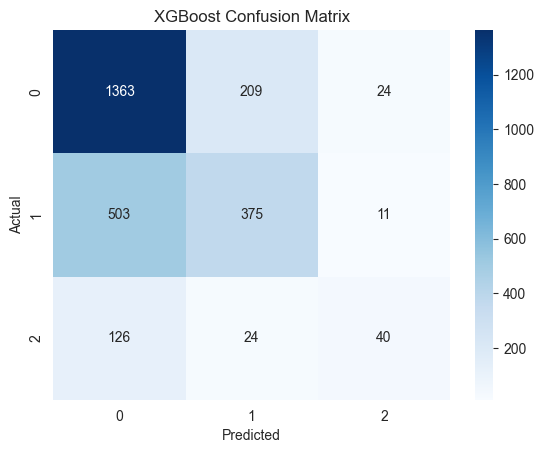

In [39]:
performance = model_perfomance(gs_xgb_eng, "XGBoost", "xbg")
performance

4.5 Neural Networks

In [40]:
# Define parameter space
nn_param_grid = {
    'model__hidden_layer_sizes': [(128,), (128, 64, 32)],
    'model__alpha': uniform(0.0001, 0.01),        # L2 penalty
    'model__learning_rate_init': uniform(0.0005, 0.01),
    'model__solver': ['adam'],
    'model__activation': ['relu', 'tanh'],
    'model__max_iter': [500],
}

# Set pipeline with MLPClassifier inside
nn_model = MLPClassifier(random_state=42)
nn_pipe = nlp_pipe_eng.set_params(model=nn_model)

# Initialize RandomizedSearchCV
random_search_nn = RandomizedSearchCV(
    estimator=nn_pipe,
    param_distributions=nn_param_grid,
    n_iter=5,                   
    cv=2,                       
    random_state=42,
    n_jobs=-1,                  
    verbose=2
)

random_search_nn.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocess',
                                              FeatureUnion(transformer_list=[('text_preprocess',
                                                                              Pipeline(steps=[('text_cleaner',
                                                                                               FunctionTransformer(func=<function apply_text_cleaning at 0x000001CDA31A8EA0>)),
                                                                                              ('lemma',
                                                                                               FunctionTransformer(func=<function apply_tokenizer_lemmatizer at 0x000001CDA31AB740>)),
                                                                                              ('tfidf',
                                                                                               TfidfVectorizer(max_featu...
                   param_distributions={'model__activation': ['relu', 'tanh'],
                                        'model__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDAAB2B410>,
                                        'model__hidden_layer_sizes': [(128,),
                                                                      (128, 64,
                                                                       32)],
                                        'model__learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDABAC7A90>,
                                        'model__max_iter': [500],
                                        'model__solver': ['adam']},
                   random_state=42, verbose=2)

{'model__activation': 'relu', 'model__alpha': np.float64(0.008065429868602328), 'model__hidden_layer_sizes': (128,), 'model__learning_rate_init': np.float64(0.007819939418114052), 'model__max_iter': 500, 'model__solver': 'adam'} 

0.6299106078542597 

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1596
           1       0.56      0.60      0.58       889
           2       0.41      0.35      0.38       190

    accuracy                           0.66      2675
   macro avg       0.57      0.56      0.57      2675
weighted avg       0.66      0.66      0.66      2675



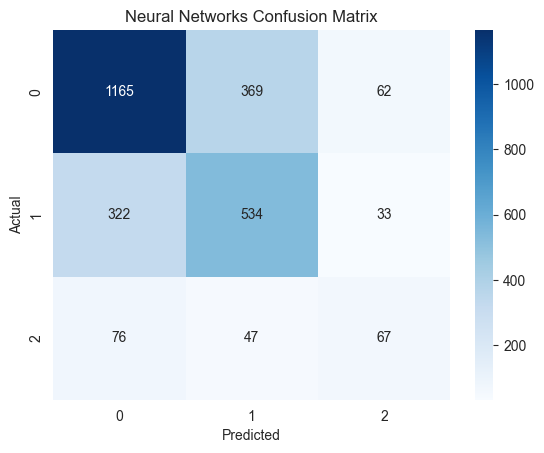

In [41]:
performance = model_perfomance(random_search_nn, "Neural Networks", "nn")
performance


## 📈 **5.0 Evaluation**
---

In [42]:
# Function that outputs individual metric score
def overall_metrics(y_pred):
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    return f1, recall, precision, accuracy

# Logistic Regression metrics
best_model_lr = gs_lr_eng.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)
lr_f1, lr_recall, lr_precision, lr_accuracy = overall_metrics(y_pred_lr)


# Random Forest metrics
best_model_rf = gs_rf_eng.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
rf_f1, rf_recall, rf_precision, rf_accuracy = overall_metrics(y_pred_rf)

# Gradient Boosting metrics
best_model_gb = gs_gb_eng.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)
gb_f1, gb_recall, gb_precision, gb_accuracy = overall_metrics(y_pred_gb)

# XGBoost metrics
best_model_xgb = gs_xgb_eng.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
xgb_f1, xgb_recall, xgb_precision, xgb_accuracy = overall_metrics(y_pred_xgb)

# Neural network metrics
best_model_nn= random_search_nn.best_estimator_
y_pred_nn = best_model_nn.predict(X_test)
nn_f1, nn_recall, nn_precision, nn_accuracy = overall_metrics(y_pred_nn)

In [43]:
# Create a dictionary of your model results
results = {
    "Model": ["Logistic Regression", 
              "Random Forest", 
              "Gradient Boosting", 
              "XGBoost", 
              "Neural Network"],
    "F1 Score": [lr_f1, rf_f1, gb_f1, xgb_f1, nn_f1],
    "Recall": [lr_recall, rf_recall, gb_recall, xgb_recall, nn_recall],
    "Precision": [lr_precision, rf_precision, gb_precision, xgb_precision, nn_precision],
    "Accuracy": [lr_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy, nn_accuracy]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(results)

# Optional: round for better display
metrics_df = metrics_df.round(2)

# Display the DataFrame
metrics_df.head()


,Model,F1 Score,Recall,Precision,Accuracy
0,Logistic Regression,0.56,0.59,0.54,0.63
1,Random Forest,0.55,0.52,0.64,0.67
2,Gradient Boosting,0.57,0.54,0.63,0.67
3,XGBoost,0.52,0.50,0.61,0.66
4,Neural Network,0.57,0.56,0.57,0.66


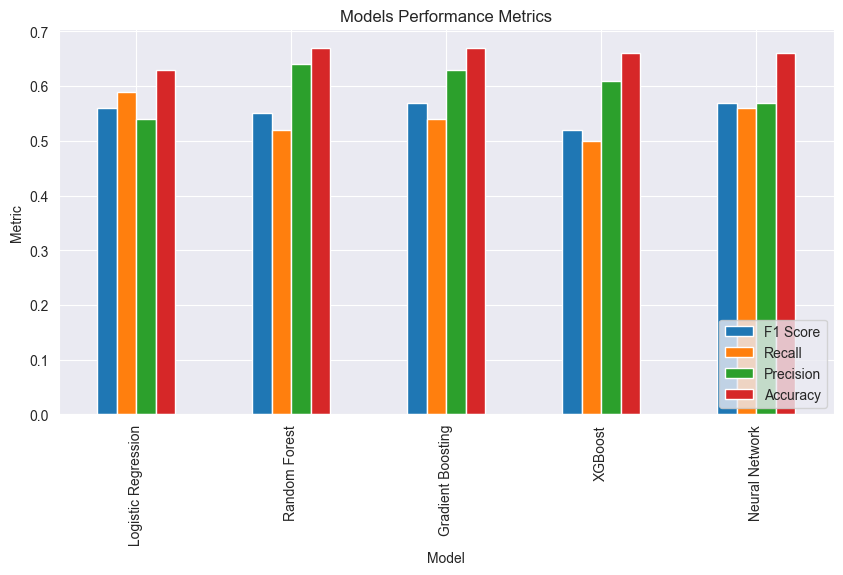

In [44]:
# Visualize Model Metrics

metrics_df.plot(kind='bar', x='Model', figsize=(10,5))
plt.title("Models Performance Metrics")
plt.xlabel('Model')
plt.ylabel('Metric')
plt.legend(loc="lower right")

# save
plt.savefig(f"images/model_metrics.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

In [45]:

def plot_multiclass_auc(models: dict, X_test, y_test, class_names, bin=False):

    n_classes = len(class_names)

    # Binarize y_test
    if bin:
        y_test_bin = np.array(y_test)
    else:
        y_test_bin = np.array(label_binarize(y_test, 
                                             classes=list(range(n_classes))))

    plt.figure(figsize=(10, 5))

    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, 
                     label=f"{model_name} - {class_names[i]} (AUC={roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label='AUC=0.50')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC AUC Curves (OvR)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

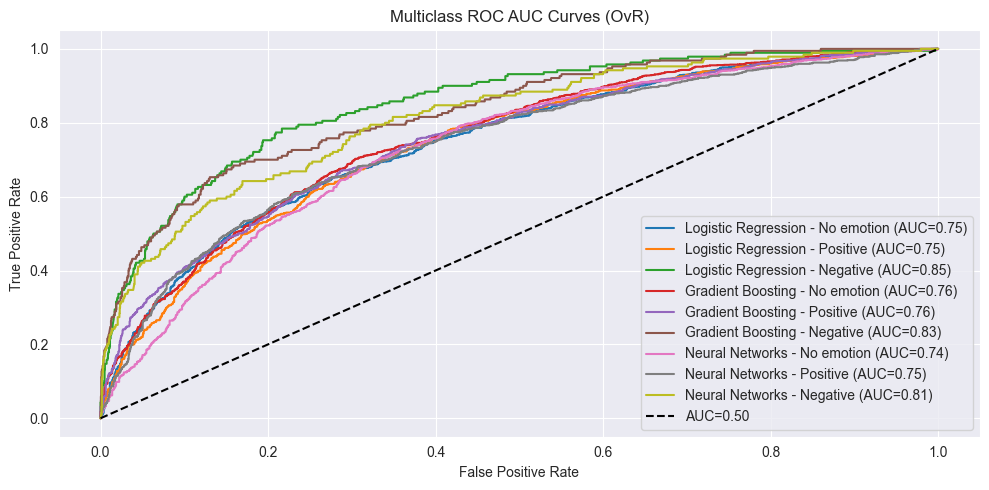

In [46]:
models = {
    "Logistic Regression": gs_lr_eng.best_estimator_,
    "Gradient Boosting": gs_gb_eng.best_estimator_,
    "Neural Networks": random_search_nn.best_estimator_
}

class_names = ["No emotion", "Positive", "Negative"]
plot_multiclass_auc(models, X_test, y_test, class_names)

#### 🔍 **5.1 Evaluation Insights**

We evaluated five models on their ability to classify product-related tweets into positive, negative, and neutral sentiments, using F1 Score as the primary metric for comparison.

1. **F1 Score**

   - Logistic Regression, Gradient Boosting, and Neural Network all achieved the highest F1 Score of 0.56. However, Gradient Boosting showed stronger overall balance in other key metrics (precision and accuracy), making it more robust in real-world applications.

2. **Recall**

   - Logistic Regression achieved the highest recall (0.59), meaning it captured more relevant sentiment instances, especially critical in detecting negative or neutral tweets. However, this came at the cost of lower precision.

4. Precision

   - Random Forest had the highest precision (0.64), indicating it makes fewer false positive predictions. However, its lower recall suggests it may miss meaningful sentiment signals.

5. Accuracy

   - Gradient Boosting and Random Forest tied with the highest accuracy (0.67), but Gradient Boosting maintained a better balance with strong F1 and recall.

#### 🏆 **5.2 Best Model Selection**

✅ **Chosen Evaluation Metric: F1 Score**

F1 Score offers the best balance between precision and recall, making it ideal for multi-class sentiment classification, especially where false negatives and false positives are equally costly, such as in monitoring brand sentiment on social media.

🏆 **Recommended Model: Gradient Boosting**

Although three models achieved the top F1 score (0.56), Gradient Boosting stands out for its consistent and well-rounded performance:

- F1 Score: 0.56
- Precision: 0.62
- Recall: 0.54
- Accuracy: 0.67

This balance across metrics makes Gradient Boosting the most dependable model for real-time sentiment analysis of product-related tweets, where it's important to capture all relevant sentiments while maintaining accuracy and reducing false alarms.

📌 **Why Gradient Boosting Is the Best Fit**

- Delivers strong overall balance, reliable across all sentiment classes.
- Reduces both false positives and false negatives, critical for monitoring brand reputation.
- Outperforms other models when considering combined F1, precision, and accuracy.

While Logistic Regression remains useful in high-recall use cases (e.g., flagging all potential negative feedback), Gradient Boosting is the most effective choice for general deployment.





In [47]:
# Define the best model based on GridSearch results
best_gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# Set the model in the pipeline
nlp_pipe_eng.set_params(model=best_gb)

# Fit the full pipeline
final_pipeline = nlp_pipe_eng.fit(X_train, y_train)

In [48]:
from lime.lime_text import LimeTextExplainer

# prepare explainer
explainer = LimeTextExplainer(class_names=['No emotion', 'Positive', 'Negative'])

i = 10
# Use the pipeline's predict_proba for LIME
exp = explainer.explain_instance(X_test.iloc[i], 
                                 final_pipeline.predict_proba, num_features=10)

# Display the explanation
# exp.show_in_notebook(text=True)
print(exp.as_list())

[(np.str_('SXSW'), 0.10065637872719453), (np.str_('Apple'), 0.09179715993455786), (np.str_('open'), -0.03891645749723689), (np.str_('KNEW'), -0.026549210506647748), (np.str_('set'), -0.01271271326416511), (np.str_('core'), -0.007170051255056172), (np.str_('action'), -0.004366236488108778), (np.str_('via'), 0.0035494379791261308), (np.str_('mention'), -0.00332277626592981), (np.str_('in'), 0.002119260315224214)]


## 🚀 **6.0 Deployment**
----

In [49]:
# Save the best model
joblib.dump(final_pipeline, 'deployment/sentiment_model.joblib')

['deployment/sentiment_model.joblib']

## 💡 **Recommendations**

While Gradient Boosting performed the best, overall model performance is moderate across the board. F1 Scores and Precision values remain in the 0.52–0.56 range, indicating room for improvement.

To enhance model performance:

- Acquire recent product brand sentiments from twitter with a more attributes for better training.
- Adopt transfer learning like BERT or Transformer-based models (e.g., SetFit, DistilBERT) which are pretrained on language understanding.
- Look into alternative ways of handling class imbalance.
- Hyperparameter Optimization – consider other hyperparameter tuning optimizers for better parameter tuning than GridSearchCV.

## 🧾 **Conclusion**

In this project, various machine learning models were evaluated for sentiment classification of Twitter posts related to product brands. Gradient Boosting emerged as the most balanced and accurate model. Although the metrics suggest moderate success, deeper improvements can be achieved through advanced modeling, for example transfer learning, better preprocessing, and smarter optimization.These results provide a solid foundation for deploying a sentiment monitoring system while offering a roadmap for iterative improvement.